In [3]:
!unzip StudentPerfDataset.zip

Archive:  StudentPerfDataset.zip
  inflating: StudentsPerformance.csv  


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


array([[<Axes: xlabel='math score', ylabel='math score'>,
        <Axes: xlabel='reading score', ylabel='math score'>,
        <Axes: xlabel='writing score', ylabel='math score'>],
       [<Axes: xlabel='math score', ylabel='reading score'>,
        <Axes: xlabel='reading score', ylabel='reading score'>,
        <Axes: xlabel='writing score', ylabel='reading score'>],
       [<Axes: xlabel='math score', ylabel='writing score'>,
        <Axes: xlabel='reading score', ylabel='writing score'>,
        <Axes: xlabel='writing score', ylabel='writing score'>]],
      dtype=object)

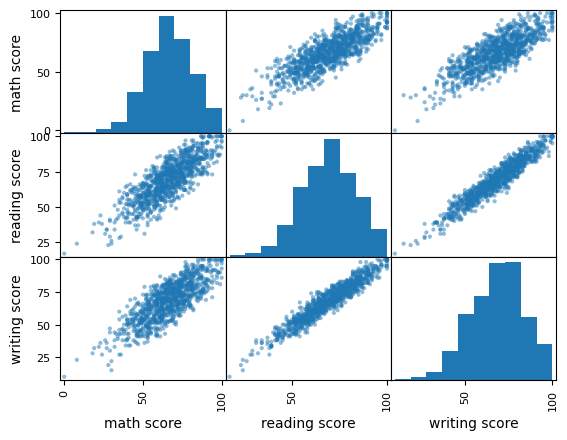

In [9]:
scatter_matrix(df)

In [10]:

num_features = ['math score', 'reading score']
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']



In [11]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [25]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

score_transform = Pipeline([('pass', 'passthrough')])

X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['writing score']])

X_test = pipeline.transform(test_df)
Y_test = score_transform.transform(test_df[['writing score']])


In [27]:
X_train, Y_train

(array([[59., 71.,  1., ...,  1.,  0.,  1.],
        [56., 65.,  1., ...,  0.,  0.,  1.],
        [60., 68.,  0., ...,  1.,  0.,  1.],
        ...,
        [38., 60.,  1., ...,  0.,  0.,  1.],
        [72., 64.,  0., ...,  1.,  0.,  1.],
        [65., 78.,  1., ...,  1.,  1.,  0.]]),
      writing score
 354             70
 319             63
 681             60
 375             41
 392             67
 ..             ...
 695             86
 741             56
 9               50
 83              63
 899             82
 
 [800 rows x 1 columns])

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
Y_hat = model.predict(X_test)

In [34]:
Y_pred = score_transform.inverse_transform(Y_hat)
Y_target = score_transform.inverse_transform(Y_test)

In [35]:

error = mean_squared_error(Y_pred, Y_target)
error

35.78

In [38]:
list(zip(Y_pred, Y_target.values.flatten()))

[(55, 49),
 (75, 83),
 (50, 64),
 (76, 80),
 (78, 73),
 (74, 80),
 (74, 73),
 (76, 86),
 (52, 57),
 (47, 57),
 (56, 64),
 (58, 62),
 (66, 64),
 (60, 67),
 (86, 91),
 (67, 64),
 (63, 76),
 (71, 65),
 (87, 92),
 (39, 43),
 (66, 68),
 (47, 45),
 (68, 67),
 (47, 42),
 (73, 64),
 (68, 71),
 (53, 51),
 (78, 76),
 (42, 52),
 (55, 57),
 (86, 79),
 (67, 74),
 (94, 92),
 (72, 67),
 (78, 69),
 (94, 96),
 (73, 63),
 (76, 61),
 (59, 66),
 (93, 100),
 (65, 55),
 (78, 74),
 (64, 63),
 (87, 88),
 (50, 58),
 (76, 73),
 (60, 58),
 (54, 67),
 (46, 48),
 (63, 66),
 (78, 78),
 (52, 58),
 (64, 61),
 (27, 38),
 (76, 76),
 (83, 73),
 (47, 53),
 (43, 43),
 (62, 70),
 (76, 71),
 (37, 34),
 (51, 56),
 (81, 86),
 (70, 68),
 (67, 62),
 (46, 51),
 (89, 79),
 (65, 72),
 (91, 98),
 (100, 100),
 (74, 71),
 (44, 55),
 (82, 80),
 (48, 54),
 (58, 52),
 (50, 54),
 (51, 47),
 (84, 80),
 (88, 88),
 (62, 60),
 (68, 74),
 (77, 65),
 (75, 73),
 (63, 47),
 (84, 82),
 (64, 66),
 (42, 42),
 (59, 70),
 (73, 77),
 (76, 80),
 (82, 8